### Data Understanding, Data Handling & Data Cleaning

In [53]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading loan.csv file and storing it in 'loan' dataframe

loan = pd.read_csv('loan.csv', engine = 'python')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Finding shape of loan dataframe

loan.shape

(39717, 111)

In [4]:
# Finding number of NA columns in loan dataframe

loan.isnull().sum(axis = 0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# No of null values in loan_status' column
loan['loan_status'].isnull().sum()

0

Since we need to find out the driving factors for defaulting the loan, we do not need members who are currently in the process of paying the loan. 

Hence, we will drop all the values for which the loan status is 'Current'

In [5]:
#Dropping the Current status from loan dataframe

loan = loan[~(loan['loan_status'] == 'Current')]
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


We need to calculate the default rate, to understand the percentage of defaulters and non-defaulters.

For doing so, we will assign '0' value for 'Fully Paid' loan status and '1' for 'Charged Off' loan status

In [6]:
# Assigning 0 value for Fully Paid loan status & 1 value for Charged off status

loan['Default_Rate'] = loan['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default_Rate
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0


In [8]:
# Checking all the columns having null values

loan.isnull().sum(axis = 0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Default_Rate                      0
Length: 112, dtype: int64

In [9]:
# Checking number of null values in 'emp_length'

loan['emp_length'].isnull().sum()

1033

In [10]:
# Checking percentage of null values in 'emp_length'

(loan['emp_length'].isnull().sum()/len(loan.index))*100

2.6777613603960906

Since the percentage of null values in 'emp_length' is quite low, it is better to impute values for our analysis

In [11]:
# Finding the datatype of 'emp_length'

loan['emp_length'].dtype

dtype('O')

We will impute the null values with maximum employment length in the list

In [12]:
# Finding the maximum employment length in the list
loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [7]:
#Imputing the null values with 10+ years

loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].mode()[0])
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default_Rate
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0


In [14]:
# Confirm if all the null values have been removed from emp_length column

loan['emp_length'].isnull().sum()

0

Hence, all the null values ahve been imputed.

Also, the employment length should be an integer, we will convert the strings to integer by removing words and characters ('<', '+', 'years') from them

In [8]:
# Removing characters and converting 'emp_length' to int data type

loan['emp_length'] = loan['emp_length'].apply(lambda x : int(x.lstrip('< ').rstrip('years').rstrip('+ ')))
loan['emp_length'].head()

0    10
1     1
2    10
3    10
5     3
Name: emp_length, dtype: int64

In [9]:
# Dropping all the columns having null values

loan = loan.dropna(axis = 'columns')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0


In [17]:
# Checking if any null values exists in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  int64  
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

In [18]:
loan['issue_d'].dtype

dtype('O')

In [10]:
# Exporting month & year of issue_d

loan['issue_d_year'] = loan['issue_d'].apply(lambda x : x[-2:])
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,1,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0,11
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0,11


In [11]:
# Exporting month of issue_d

loan['issue_d_month'] = loan['issue_d'].apply(lambda x : x[:-3])
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0,11,Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,119.66,1,INDIVIDUAL,0,0,1,11,Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0,11,Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0,11,Dec
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0,11,Dec


We will replace the month name with month number & month name. This is very helpful to automatically sort the values as per month in our plots.

In [12]:
# Replacing month name with month number & month name
def switch_demo(argument):
    switcher = {
        "Jan": '01 - Jan',
        "Feb" : '02 - Feb',
        "Mar" : '03 - Mar',
        "Apr" : '04 - Apr',
        "May" : '05 - May',
        "Jun" : '06 - Jun',
        "Jul" : '07 - Jul',
        "Aug" : '08 - Aug',
        "Sep" : '09 - Sep',
        "Oct" : '10 - Oct',
        "Nov" : '11 - Nov',
        "Dec" : '12 - Dec'
    }
    return switcher.get(argument, "Invalid month")
    
loan['issue_d_month'] = loan['issue_d_month'].apply(switch_demo)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0,11,12 - Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,119.66,1,INDIVIDUAL,0,0,1,11,12 - Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0,11,12 - Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0,11,12 - Dec
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0,11,12 - Dec


### Data Analysis - Univariate Analysis

We need to create bins for various variables and we will use box plot to decide the range of bins.

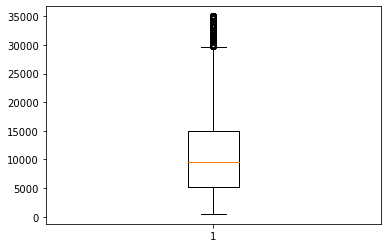

In [25]:
# Creating box plot for funded amount
plt.boxplot(loan['funded_amnt'])
plt.show()

In [28]:
# Checking the data type of funded amount

loan['funded_amnt'].dtype

dtype('int64')

In [13]:
# Creating bins for funded_amnt

def funded_amnt_bins(y):
    if(y>=0 and y<=5000):
        bin_value = 'Between  0 to 5000'
    elif (y > 5000 and y <= 10000):
        bin_value = 'Between  5001 to 10000'
    elif (y > 10000 and y <= 15000):
        bin_value = 'Between 10001 to 15000'
    elif (y > 15000 and y <= 30000):
        bin_value = 'Between 15001 to 30000'
    else:
        bin_value = 'Greater than 30000'
    
    return bin_value

loan['funded_amnt_bins'] = loan['funded_amnt'].apply(funded_amnt_bins)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,171.62,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,119.66,1,INDIVIDUAL,0,0,1,11,12 - Dec,Between 0 to 5000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,649.91,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,357.48,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,161.03,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000


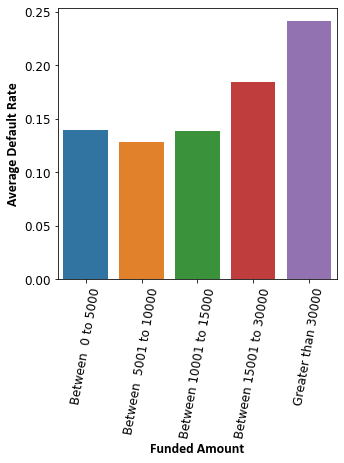

In [15]:
# Plotting bar plot for funded_amnt vs Default Rate
plt.figure(figsize=(5,5))
fig = sns.barplot(data = loan, x = 'funded_amnt_bins', y = 'Default_Rate', estimator = np.mean, ci = None)
plt.xticks(rotation = 80, fontsize = 12)
plt.yticks(fontsize = 12)
fig.set_xlabel('Funded Amount', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 14, fontname = 'Calibri', weight = 'bold')

plt.show()


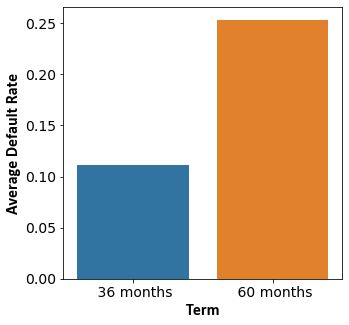

In [25]:
# Plotting the bar plot for Term vs Default Rate
plt.figure(figsize=(5,5))
fig = sns.barplot(data = loan, x = 'term', y = 'Default_Rate', estimator = np.mean, ci = None)
fig.set_xlabel('Term', fontsize = 16, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 16, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [17]:
# Stripping the characters from Interest Rate and converting to type float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,171.62,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,119.66,1,INDIVIDUAL,0,0,1,11,12 - Dec,Between 0 to 5000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,649.91,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,357.48,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,161.03,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000


In [37]:
# Checking data type of Interest Rate column
loan['int_rate'].dtype

dtype('float64')

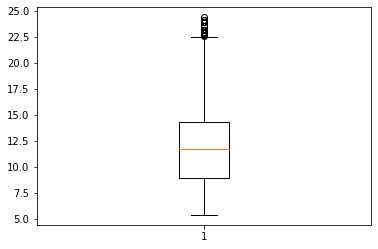

In [38]:
# Plotting box plot for Interest Rate
plt.boxplot(loan['int_rate'])
plt.show()

In [39]:
# Checking values of Interest Rate at different percentiles

loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [18]:
# Creating bins for Interest Rate

def int_rate_bins(y):
    if(y>=5 and y<=9):
        bin_value = ' 5.00 - 9.00'
    elif (y > 9 and y <= 12):
        bin_value = ' 9.01 - 12.00'
    elif (y > 12 and y <= 15):
        bin_value = '12.01 - 15.00'
    elif (y > 15 and y <= 24):
        bin_value = '15.01 - 24.00'
    else:
        bin_value = '> 24.00'
    
    return bin_value

loan['int_rate_bins'] = loan['int_rate'].apply(int_rate_bins)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins,int_rate_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,9.01 - 12.00
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,1,INDIVIDUAL,0,0,1,11,12 - Dec,Between 0 to 5000,15.01 - 24.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,15.01 - 24.00
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000,12.01 - 15.00
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,5.00 - 9.00


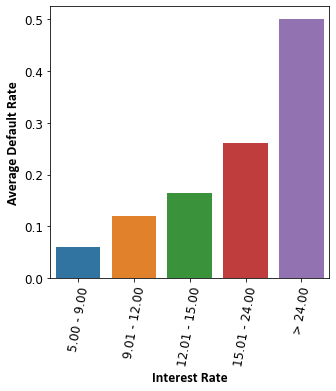

In [19]:
# Plotting the bar plot for Interest Rate vs Default Rate

plt.figure(figsize=(5,5))
fig = sns.barplot(data = loan, x = 'int_rate_bins', y = 'Default_Rate', estimator = np.mean, ci = None, order = loan.groupby(['int_rate_bins'])['Default_Rate'].mean().sort_values(ascending = True).index)
fig.set_xlabel('Interest Rate', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 12, rotation = 80)
plt.yticks(fontsize = 12)
plt.show()

In [46]:
# Checking values of Annual Income at different percentiles

loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [20]:
# Creating bins for Annual Income

def annual_inc_bins(y):
    if(y >= 4000 and y <= 40000):
        bin_value = '4000 - 40000'
    elif (y > 40000 and y <= 60000):
        bin_value = '40001 - 60000'
    elif (y > 60000 and y <= 82000):
        bin_value = '60001 - 82000'
    else:
        bin_value = '> 82000'
    
    return bin_value

loan['annual_inc_bins'] = loan['annual_inc'].apply(annual_inc_bins)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins,int_rate_bins,annual_inc_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,9.01 - 12.00,4000 - 40000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1,INDIVIDUAL,0,0,1,11,12 - Dec,Between 0 to 5000,15.01 - 24.00,4000 - 40000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,15.01 - 24.00,4000 - 40000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000,12.01 - 15.00,40001 - 60000
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,1,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,5.00 - 9.00,4000 - 40000


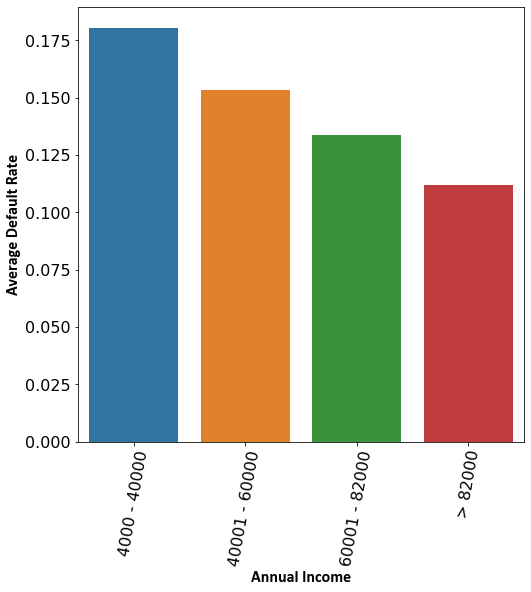

In [23]:
# Plotting the bar plot for Annual Income vs Default Rate

plt.figure(figsize=(8,8))
fig = sns.barplot(data = loan, x = 'annual_inc_bins', y = 'Default_Rate', estimator = np.mean, ci = None)
fig.set_xlabel('Annual Income', fontsize = 16, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 16, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 16, rotation = 80)
plt.yticks(fontsize = 16)
plt.show()

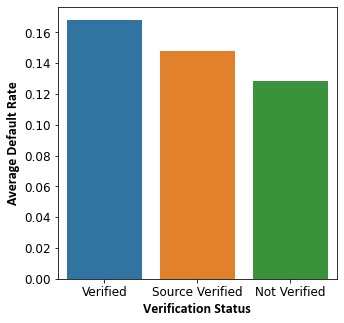

In [24]:
# Plotting the bar plot for Verification Status vs Default Rate

plt.figure(figsize=(5,5))
fig = sns.barplot(data = loan, x = 'verification_status', y = 'Default_Rate', estimator = np.mean, ci = None)
fig.set_xlabel('Verification Status', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

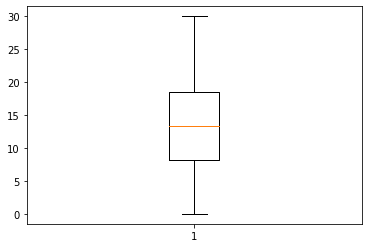

In [54]:
# Creating box plot for dti

plt.boxplot(loan['dti'])
plt.show()

In [55]:
# Checking values of dti at different percentiles

loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [56]:
# Creating bins for DTI

def dti_bins(y):
    if(y >= 0 and y <= 1):
        bin_value = '0 - 1'
    elif (y > 1 and y <= 9):
        bin_value = '1.01 - 9'
    elif (y > 9 and y <= 14):
        bin_value = '9.01 - 14'
    elif (y > 14 and y <= 19):
        bin_value = '14.01 - 19'
    else:
        bin_value = '19.01 -30'
    
    return bin_value

loan['dti_bins'] = loan['dti'].apply(dti_bins)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins,int_rate_bins,annual_inc_bins,dti_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,9.01 - 12.00,4000 - 40000,19.01 -30
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,INDIVIDUAL,0,0,1,11,12 - Dec,Between 0 to 5000,15.01 - 24.00,4000 - 40000,0 - 1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,15.01 - 24.00,4000 - 40000,1.01 - 9
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000,12.01 - 15.00,40001 - 60000,19.01 -30
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,5.00 - 9.00,4000 - 40000,9.01 - 14


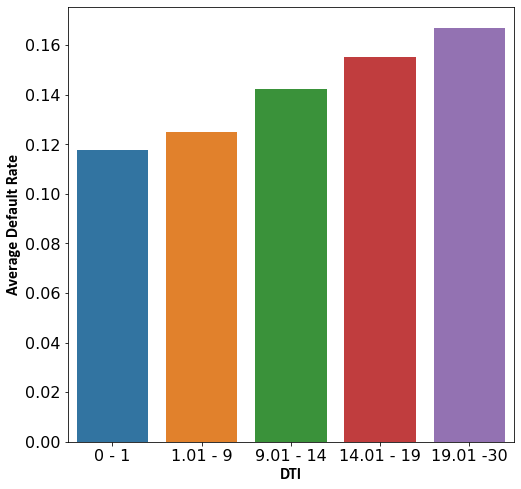

In [57]:
# Plotting the bar plot for DTI vs Default Rate

plt.figure(figsize=(8,8))
fig = sns.barplot(data = loan, x = 'dti_bins', y = 'Default_Rate', estimator = np.mean, ci = None, order = loan.groupby(['dti_bins'])['Default_Rate'].mean().sort_values(ascending = True).index)
fig.set_xlabel('DTI', fontsize = 16, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 16, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

### State Address Analysis

We will find the top five states that has the highest default rate

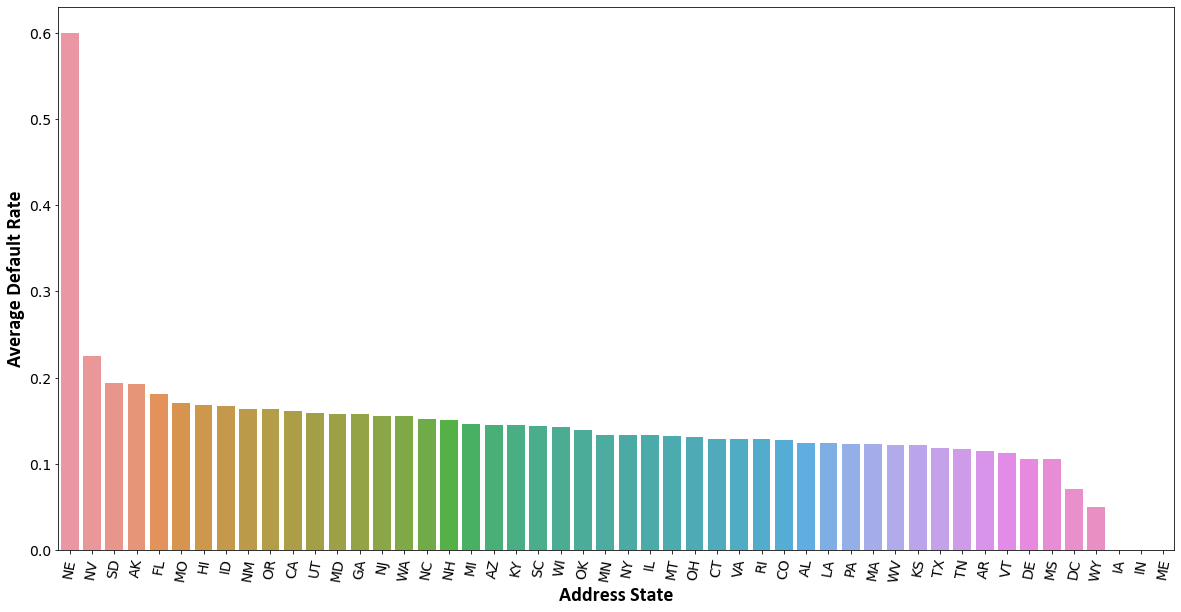

In [36]:
# Plotting the bar plot for Address State vs Default Rate

plt.figure(figsize=(20,10))
fig = sns.barplot(data = loan, x = 'addr_state', y = 'Default_Rate', estimator = np.mean, ci = None, order = loan.groupby(['addr_state'])['Default_Rate'].mean().sort_values(ascending = False).index)
fig.set_xlabel('Address State', fontsize = 20, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 20, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)
plt.show()

In [44]:
# Checking average number of defaulters for Address Sate in descending order

addrstate_defaultrate = pd.pivot_table(data = loan, index = 'addr_state', values = 'Default_Rate', aggfunc = np.mean)
print(addrstate_defaultrate.sort_values(by = 'Default_Rate', ascending = False))

            Default_Rate
addr_state              
NE              0.600000
NV              0.225470
SD              0.193548
AK              0.192308
FL              0.181230
MO              0.170149
HI              0.168675
ID              0.166667
NM              0.163934
OR              0.163218
CA              0.161894
UT              0.158730
MD              0.158358
GA              0.158205
NJ              0.155307
WA              0.155257
NC              0.152000
NH              0.150602
MI              0.146307
AZ              0.144876
KY              0.144695
SC              0.143791
WI              0.143182
OK              0.139373
MN              0.133884
NY              0.133856
IL              0.133288
MT              0.132530
OH              0.131579
CT              0.129477
VA              0.129291
RI              0.128866
CO              0.127937
AL              0.124138
LA              0.124122
PA              0.122616
MA              0.122591
WV              0.122093


In [33]:
# Keeping only top 5 states having maximum defaulters
top5_states = ['NE', 'NV', 'SD', 'AK', 'FL']
loan_top5_states = loan[(loan['addr_state'].isin(top5_states))]
loan_top5_states.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,delinq_amnt,Default_Rate,issue_d_year,issue_d_month,funded_amnt_bins,int_rate_bins,annual_inc_bins,dti_bins
21,1039153,1269083,21000,21000,21000.0,36 months,12.42,701.73,B,B4,...,INDIVIDUAL,0,0,1,11,12 - Dec,Between 15001 to 30000,12.01 - 15.00,> 82000,9.01 - 14
28,1069799,1304678,4000,4000,4000.0,36 months,11.71,132.31,B,B3,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 0 to 5000,9.01 - 12.00,> 82000,1.01 - 9
69,1069073,1303718,15000,15000,15000.0,36 months,14.65,517.42,C,C3,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 10001 to 15000,12.01 - 15.00,60001 - 82000,9.01 - 14
79,1048390,1279714,18000,18000,18000.0,60 months,19.91,475.99,E,E4,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 15001 to 30000,15.01 - 24.00,60001 - 82000,1.01 - 9
94,1068545,1303147,7000,7000,7000.0,36 months,11.71,231.54,B,B3,...,INDIVIDUAL,0,0,0,11,12 - Dec,Between 5001 to 10000,9.01 - 12.00,4000 - 40000,19.01 -30


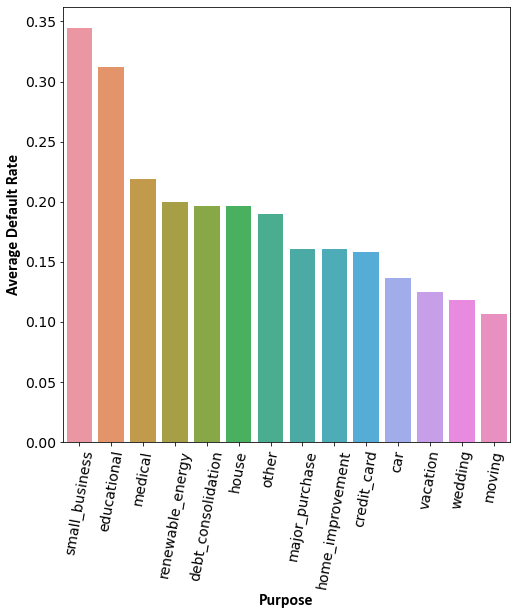

In [37]:
# Plotting the bar plot for Purpose vs Default Rate for top 5 countries

plt.figure(figsize=(8,8))
fig = sns.barplot(data = loan_top5_states, x = 'purpose', y = 'Default_Rate', estimator = np.mean, ci = None, order = loan_top5_states.groupby(['purpose'])['Default_Rate'].mean().sort_values(ascending = False).index)
fig.set_xlabel('Purpose', fontsize = 16, fontname = 'Calibri', weight = 'bold')
fig.set_ylabel('Average Default Rate', fontsize = 16, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 14, rotation = 80)
plt.yticks(fontsize = 14)
plt.show()

### Data Analysis - Bivariate Analysis

We will carry out bivariate analysis for top five states with highest default rate

In [62]:
# Creating pivot table for funded amnt, term & interest rate
pd.pivot_table(data = loan_top5_states, index = 'funded_amnt_bins', columns = ['term', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)


term                      36 months                                            \
int_rate_bins           5.00 - 9.00  9.01 - 12.00 12.01 - 15.00 15.01 - 24.00   
funded_amnt_bins                                                                
Between  0 to 5000         0.100000      0.176030      0.203704      0.270270   
Between  5001 to 10000     0.077586      0.162544      0.151261      0.240741   
Between 10001 to 15000     0.038217      0.150685      0.159292      0.215686   
Between 15001 to 30000     0.053571      0.132653      0.252525      0.178571   
Greater than 30000         0.000000      0.000000      0.000000      0.166667   

term                      60 months                                            
int_rate_bins           5.00 - 9.00  9.01 - 12.00 12.01 - 15.00 15.01 - 24.00  
funded_amnt_bins                                                               
Between  0 to 5000         0.111111      0.250000      0.275862      0.363636  
Between  5001 to 10000     0.076923      0.326531      0.318182      0.325301  
Between 10001 to 15000     0.000000      0.333333      0.413043      0.351064  
Between 15001 to 30000     0.142857      0.153846      0.218750      0.416149  
Greater than 30000              NaN      0.000000      0.250000      0.473684

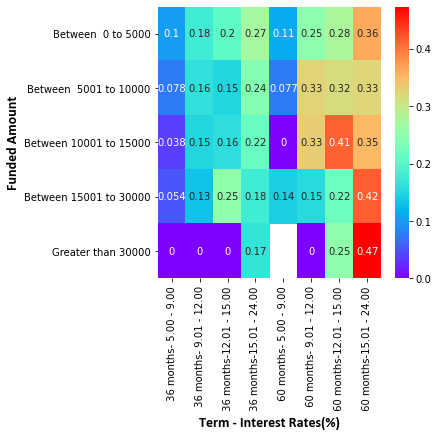

In [42]:
# Creating heatmap for funded amount, term & interest rate
funded_amnt_term_int_rate = pd.pivot_table(data = loan_top5_states, index = 'funded_amnt_bins', columns = ['term', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)

plt.figure(figsize = (5,5))
fig = sns.heatmap(funded_amnt_term_int_rate, cmap = 'rainbow', annot = True)
fig.set_ylabel('Funded Amount', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_xlabel('Term - Interest Rates(%)', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [65]:
# Creating pivot table for funded amount, annual income and interest rate
pd.pivot_table(data = loan_top5_states, index = 'funded_amnt_bins', columns = ['annual_inc_bins', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)


annual_inc_bins        4000 - 40000                                            \
int_rate_bins           5.00 - 9.00  9.01 - 12.00 12.01 - 15.00 15.01 - 24.00   
funded_amnt_bins                                                                
Between  0 to 5000         0.110000      0.217949      0.221239      0.308824   
Between  5001 to 10000     0.108108      0.206612      0.247059      0.342857   
Between 10001 to 15000     0.055556      0.282609      0.303030      0.500000   
Between 15001 to 30000     0.000000      0.200000      0.142857      0.166667   
Greater than 30000              NaN           NaN           NaN           NaN   

annual_inc_bins        40001 - 60000                              \
int_rate_bins            5.00 - 9.00  9.01 - 12.00 12.01 - 15.00   
funded_amnt_bins                                                   
Between  0 to 5000          0.130952      0.112500      0.246914   
Between  5001 to 10000      0.068966      0.170940      0.148936   
Between 10001 to 15000      0.066667      0.223881      0.283019   
Between 15001 to 30000      0.105263      0.157895      0.312500   
Greater than 30000               NaN      0.000000           NaN   

annual_inc_bins                      60001 - 82000                \
int_rate_bins          15.01 - 24.00   5.00 - 9.00  9.01 - 12.00   
funded_amnt_bins                                                   
Between  0 to 5000          0.303030      0.030303      0.240000   
Between  5001 to 10000      0.323529      0.058140      0.148148   
Between 10001 to 15000      0.285714      0.000000      0.139535   
Between 15001 to 30000      0.500000      0.076923      0.108108   
Greater than 30000               NaN           NaN      0.000000   

annual_inc_bins                                         > 82000                \
int_rate_bins          12.01 - 15.00 15.01 - 24.00  5.00 - 9.00  9.01 - 12.00   
funded_amnt_bins                                                                
Between  0 to 5000          0.178571      0.200000     0.062500      0.133333   
Between  5001 to 10000      0.196429      0.142857     0.065574      0.225000   
Between 10001 to 15000      0.170213      0.206897     0.018868      0.136364   
Between 15001 to 30000      0.238095      0.428571     0.043478      0.141026   
Greater than 30000          0.250000      0.500000     0.000000      0.000000   

annual_inc_bins                                     
int_rate_bins          12.01 - 15.00 15.01 - 24.00  
funded_amnt_bins                                    
Between  0 to 5000          0.086957      0.428571  
Between  5001 to 10000      0.085106      0.120000  
Between 10001 to 15000      0.153846      0.233333  
Between 15001 to 30000      0.196970      0.215909  
Greater than 30000          0.125000      0.333333

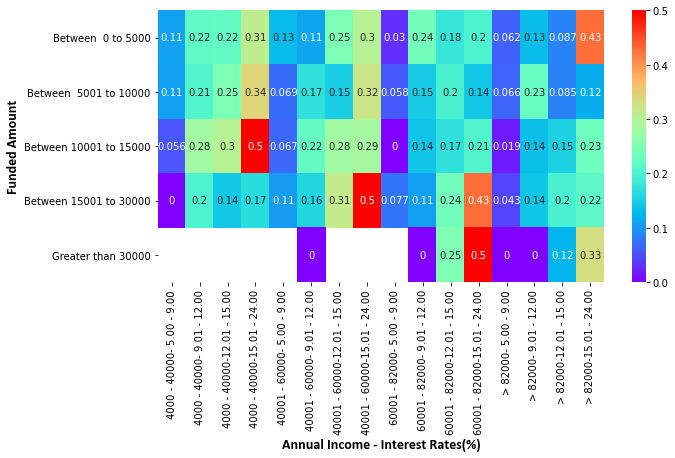

In [44]:
# Heatmap for funded amount, annual income and interest rate
funded_amnt_annualinc_int_rate = pd.pivot_table(data = loan_top5_states, index = 'funded_amnt_bins', columns = ['annual_inc_bins', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)

plt.figure(figsize = (10,5))
fig = sns.heatmap(funded_amnt_annualinc_int_rate, cmap = 'rainbow', annot = True)
fig.set_ylabel('Funded Amount', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_xlabel('Annual Income - Interest Rates(%)', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [76]:
# Pivot Table for Annual Income & Verification Status

pd.pivot_table(data = loan_top5_states, index = 'funded_amnt_bins', columns = 'verification_status', values = 'Default_Rate', aggfunc = np.mean)


verification_status,Not Verified,Source Verified,Verified
funded_amnt_bins,,,
Between 0 to 5000,0.190855,0.150198,0.217687
Between 5001 to 10000,0.153846,0.156740,0.198473
Between 10001 to 15000,0.177419,0.223404,0.175966
Between 15001 to 30000,0.250000,0.163636,0.252604
Greater than 30000,NaN,0.166667,0.261905


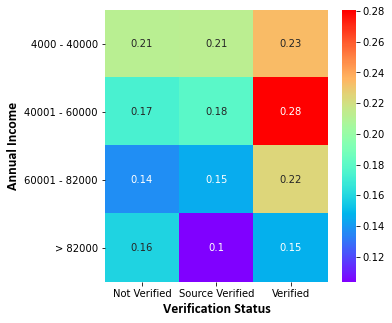

In [47]:
# Heat map for annual income & verification status
plt.figure(figsize = (5,5))
annualinc_verificationStatus = pd.pivot_table(data = loan_top5_states, index = 'annual_inc_bins', columns = 'verification_status', values = 'Default_Rate', aggfunc = np.mean)
fig = sns.heatmap(annualinc_verificationStatus, cmap = 'rainbow', annot = True)
fig.set_ylabel('Annual Income', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_xlabel('Verification Status', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [78]:
# Creating pivot table for annual income, term & bins
pd.pivot_table(data = loan_top5_states, index = 'annual_inc_bins', columns = ['term', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)


term               36 months                                            \
int_rate_bins    5.00 - 9.00  9.01 - 12.00 12.01 - 15.00 15.01 - 24.00   
annual_inc_bins                                                          
4000 - 40000        0.089652      0.142275      0.185403      0.232143   
40001 - 60000       0.064725      0.103146      0.148264      0.213447   
60001 - 82000       0.039354      0.100000      0.116071      0.173529   
> 82000             0.031996      0.072160      0.106168      0.164654   

term               60 months                                                    
int_rate_bins    5.00 - 9.00  9.01 - 12.00 12.01 - 15.00 15.01 - 24.00 > 24.00  
annual_inc_bins                                                                 
4000 - 40000        0.165138      0.255869      0.340381      0.367372     1.0  
40001 - 60000       0.102941      0.192481      0.261834      0.334096     NaN  
60001 - 82000       0.087719      0.155983      0.208413      0.323529     1.0  
> 82000             0.000000      0.132325      0.159021      0.241071     0.0

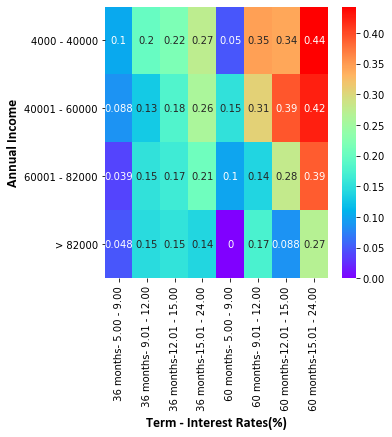

In [48]:
# Heat map for Annual Income, Term & Interest Rate
annual_inc_term_int_rate = pd.pivot_table(data = loan_top5_states, index = 'annual_inc_bins', columns = ['term', 'int_rate_bins'], values = 'Default_Rate', aggfunc = np.mean)
plt.figure(figsize = (5,5))
fig = sns.heatmap(annual_inc_term_int_rate, cmap = 'rainbow', annot = True)
fig.set_ylabel('Annual Income', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_xlabel('Term - Interest Rates(%)', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [80]:
# Creating pivot table for purpose & month
pd.pivot_table(loan_top5_states, index = 'purpose', columns = 'issue_d_month', values = 'Default_Rate', aggfunc = np.mean)

issue_d_month,01 - Jan,02 - Feb,03 - Mar,04 - Apr,05 - May,06 - Jun,07 - Jul,08 - Aug,09 - Sep,10 - Oct,11 - Nov,12 - Dec
purpose,,,,,,,,,,,,
car,0.222222,0.153846,0.055556,0.100000,0.000000,0.000000,0.000000,0.100000,0.117647,0.100000,0.333333,0.363636
credit_card,0.235294,0.068966,0.235294,0.043478,0.208333,0.074074,0.081081,0.228571,0.090909,0.170732,0.133333,0.232877
debt_consolidation,0.197917,0.166667,0.173469,0.131313,0.233010,0.188034,0.173913,0.218750,0.173228,0.210526,0.239766,0.206704
educational,0.000000,0.000000,0.000000,0.666667,0.000000,0.250000,0.666667,0.333333,0.333333,0.200000,0.500000,0.000000
home_improvement,0.285714,0.250000,0.157895,0.058824,0.121951,0.187500,0.111111,0.270270,0.135135,0.225806,0.041667,0.176471
house,0.000000,0.000000,0.428571,0.500000,0.333333,0.250000,0.000000,0.000000,0.200000,0.222222,0.166667,0.000000
major_purchase,0.166667,0.142857,0.100000,0.142857,0.250000,0.307692,0.238095,0.071429,0.178571,0.000000,0.052632,0.166667
medical,0.000000,0.000000,0.000000,0.400000,0.333333,0.400000,0.333333,0.166667,0.500000,0.142857,0.166667,0.111111
moving,0.000000,0.000000,0.333333,0.000000,0.000000,0.200000,0.142857,0.125000,0.000000,0.000000,0.000000,0.142857


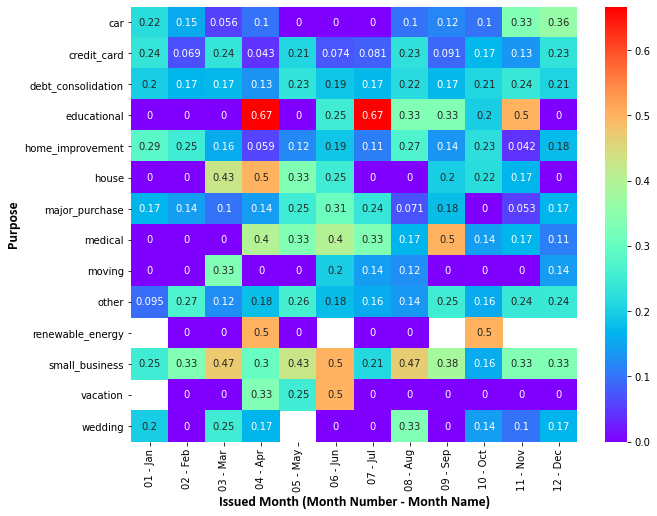

In [52]:
# Heat map for purpose & month

purpose_month = pd.pivot_table(loan_top5_states, index = 'purpose', columns = 'issue_d_month', values = 'Default_Rate', aggfunc = np.mean)
plt.figure(figsize = (10,8))
fig = sns.heatmap(purpose_month, cmap = 'rainbow', annot = True)
fig.set_ylabel('Purpose', fontsize = 14, fontname = 'Calibri', weight = 'bold')
fig.set_xlabel('Issued Month (Month Number - Month Name)', fontsize = 14, fontname = 'Calibri', weight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()